In [1]:
# Importing Packages
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
# Creating expected reward function
def random_customer(avail_seat):
    '''
    This function will generate a random number of customer who will buy 
    the flight ticket in one day. The number is limited by the availibility
    of the seats.

    Args:
    None

    Return:
    random_cust (int) -> number of customer that day

    '''
    random_cust = random.randint(1, avail_seat)

    return random_cust

In [38]:
def exp_reward_matrix(remain_seat, remain_day):
    '''
    Function to calculate the expected reward matrix

    Args:
    remain_seat (int) -> total remaining available seats
    remain_day (int) -> total remaining days until the flight

    Return:
    total_reward (float) -> total expected reward
    '''

    reward_matrix = np.zeros((11,26))

    for seat in range(1,11):
        for day in range(1,26):
            policy = set_policy(seat, day)
            if policy == 1:
                reward_matrix[seat,day] = 0.4 * (3000 + reward_matrix[seat-1, day-1]) + 0.3 * (reward_matrix[seat, day-1]) + 0.3 * (reward_matrix[seat, day-1])
            elif policy == 2:
                reward_matrix[seat,day] = 0.4 * (3000 + reward_matrix[seat-1, day-1]) + 0.3 * (2000 + reward_matrix[seat-1, day-1]) + 0.3 * (reward_matrix[seat, day-1])
            else:
                reward_matrix[seat,day] = 0.4 * (3000 + reward_matrix[seat-1, day-1]) + 0.3 * (2000 + reward_matrix[seat-1, day-1]) + 0.3 * (1000 + reward_matrix[seat-1, day-1])
    
    return reward_matrix[remain_seat, remain_day]

In [64]:
def monte_simulation(remain_seat, remain_day):
    reward = []
    for day in range(remain_day,0,-1):
        if remain_seat > 0:
            current_exp_reward_init = exp_reward_matrix(remain_seat,remain_day)

            # remain seat after random customer buy seat this day
            num_cust_today = random_customer(remain_seat)
            remain_seat = remain_seat - num_cust_today
            current_exp_reward_after = exp_reward_matrix(remain_seat, day)

            expected_reward = current_exp_reward_init - current_exp_reward_after
            reward.append(expected_reward)
            
    total_reward = sum(reward)
    return total_reward

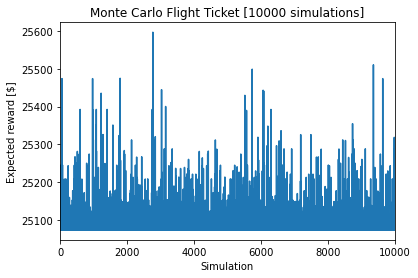

In [80]:
remain_seat = 10
remain_day = 25
num_simulations = 10000

sim_ax = []
reward_ax = []

for sim in range(0,num_simulations):
    rewards = monte_simulation(10,25)
    reward_ax.append(rewards)
    sim_ax.append(sim)

fig = plt.figure()
plt.title("Monte Carlo Flight Ticket [" + str(num_simulations) + " simulations]")
plt.xlabel("Simulation")
plt.ylabel("Expected reward [$]")
plt.xlim([0, num_simulations])
plt.plot(sim_ax, reward_ax)

In [79]:
print('Mean of payments is', np.average(reward_ax))
print('Standard deviation of payments is', np.std(reward_ax))

Mean of payments is 25086.859496310874
Standard deviation of payments is 33.19503909045189
